<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4

## How to easily set up a working folder

In [17]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [14]:
pwd

'/content/drive/MyDrive'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

In [19]:
pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/L1Data.csv')

,Class,Age,Funds,Sale
0,Freshmen,18.0,600.0,No
1,Freshmen,18.0,500.0,No
2,Freshmen,18.0,600.0,No
3,Senior,23.0,800.0,No
4,Junior,21.0,400.0,Yes
5,Freshmen,19.0,600.0,No
6,Freshmen,20.0,600.0,No
7,Senior,24.0,NaN,Yes
8,Sophomore,23.0,620.0,Yes
9,Sophomore,25.0,800.0,Yes


In [20]:
for i in range(10):
  print(i+1)

1
2
3
4
5
6
7
8
9
10


## <font color='navy'>Monte Carlo Simulations</font>

The main goal is to solve problems of data science by approximating probability values via carefully designed simulations. 

<font color='lightsalmon'>**Critical Thinking**</font>: we want to be problem solvers and we can address many practical questions by using repeated sampling from known distributions along with carefully qualified mathematical considerations.

<font color='skyblue'> Example 1. (with Python coding): </font> Flipping a coin and experimentally determining the probability of heads or tails.

Text(0, 0.5, 'Probability')

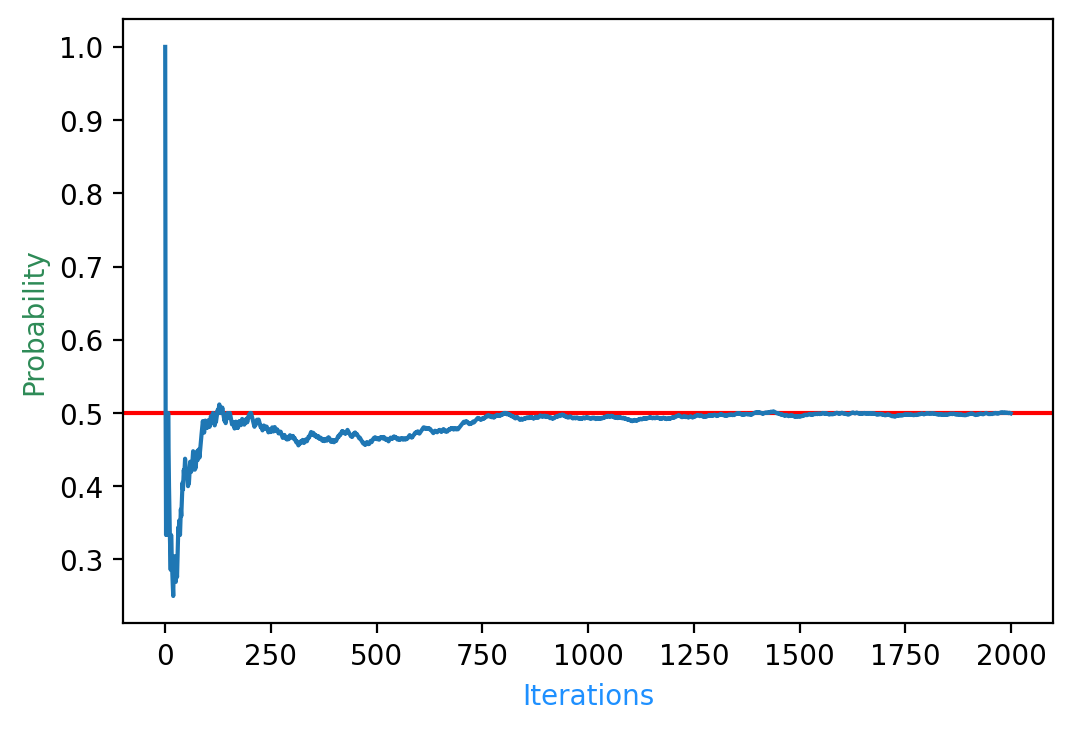

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
 
def coin_flip():
  return random.randint(0,1)
 
# create an empty list to store all probability values
listp = []
 
# create the Monte Carlo simulation function
def monte_carlo(n):
  results = 0;
  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result
 
    #compute probability
    prob_val = results/(i+1)
 
    # update the list of probability values
    listp.append(prob_val)
 
  return results/n
 
answer = monte_carlo(2000)
 
# plot the results
 
plt.axhline(y=0.5, color = 'red')
plt.plot(listp)
plt.xlabel("Iterations",color='dodgerblue')
plt.ylabel("Probability",color='seagreen')

## <font color='navy'>Probability</font>

The main idea can be explained in simple terms:

If $A$ is some event then the probability of $A$ can be understood as its frequency of occurring. Thus we understand that the probability is always a number $p$ such that 

$$0\leq p\leq 1$$

The probability of the event $A$ can be denoted by $$P(A)$$ and if we have finitely many outcomes  then $$P(A):=\frac{n(A)}{n(X)}$$ where $n(A)$ represents the number of favorable outcomes to $A$ and $n(X)$ represents the total number of outcomes. If we think of repeating an experiment finitely many times where $A$ is a possible outcome, then $P(A)$ can be approximated by the relative frequency of occurrence provided we repeated the experiment *sufficiently* many times.

In practice the study of continuous random variables and different probability distributions is extremely important.

### <font color='skyblue'> Example</font>

In Python, we can use many different probability distributions. The following code demonstrates the *uniform* distribution and the *normal* distribution.

Code to display a histogram and the fit for a uniform distribution:
```python
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns
sns.set(color_codes=True)

# import uniform distribution
from scipy import stats
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniform ', ylabel='Frequency')
```

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform ')]

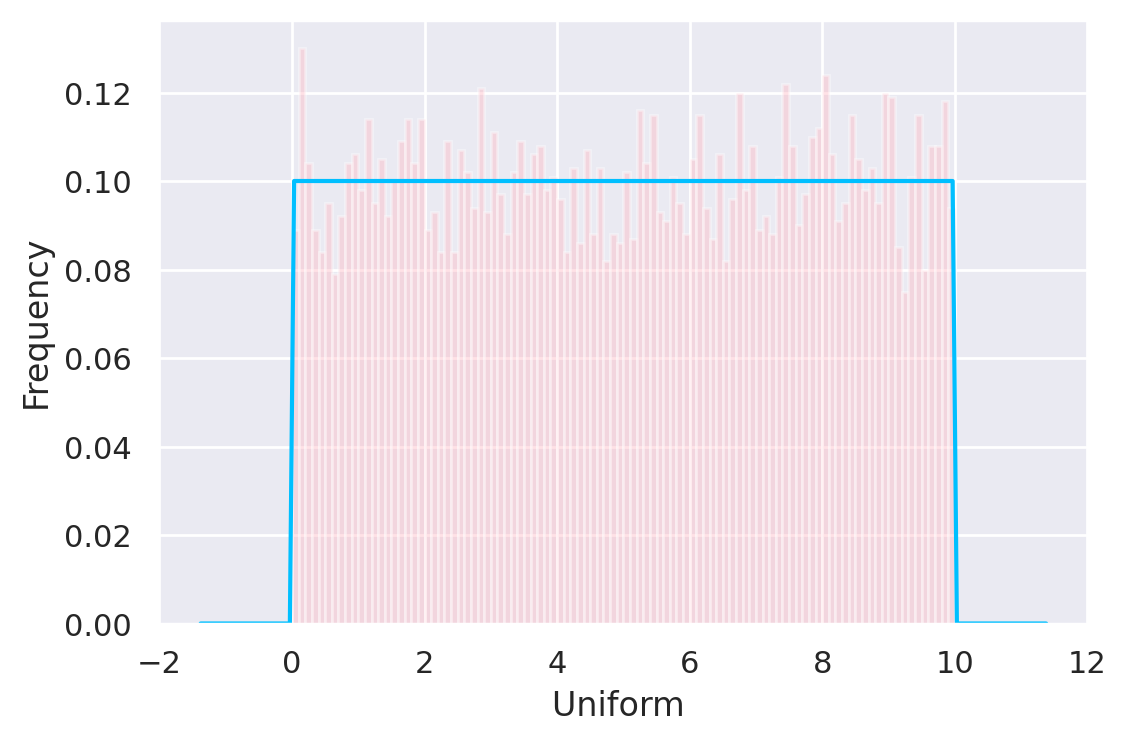

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
 
# import seaborn
import seaborn as sns
sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b)
 
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Uniform ', ylabel='Frequency')

## <font color='blue'> Bayesian Theorem</font>

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}}$$

Where $P(A|B)$ means the probability of event $A$ provided event $B$ holds.

The main idea comes from the conditional probability rule:

$$\Large{P(A\cap B) = P(A)\cdot P(B\,|\,A) = P(B\cap A)=P(B)\cdot P(A\,|\,B)}$$

The intuition could be presented in a visual way:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1O2Hg3q1RwxmxDuoi5pqG4W8Xnqb7zA1C'
width='500px' />
<figcaption>Example of conditional events by using a Venn Diagram</figcaption></center>
</figure>

where $\large{P(A)=\displaystyle\frac{Area(A)}{Area(S)}}$ $\large{P(B)=\displaystyle\frac{Area(B)}{Area(S)}}$ and $\large{P(A\cap B)=\displaystyle\frac{Area(A\cap B)}{Area(S)}}.$


<font color='lightsalmon'>**Critical thinking question**: What is $P(A\,|\,B)$? 
</font>

### <font color='darkpink'>Bayesian Inference </font>

$$\Large{P(H\,|\,\text{data})}=\frac{P(\text{data}\,|\,H )\cdot P(H)}{P(\text{data})}$$

<font color='darkgreen'>**Terminology**</font>


- <font color='deepskyblue'>*Posterior*</font>: How probable is our hypothesis given the data observations (the specific evidence we collected)?


- <font color='deepskyblue'>*Likelihood*</font>: It represents how probable is the evidence given that our hypothesis is true.

- <font color='deepskyblue'>*Prior*</font>: How probable or frequent is our hypothesis in general?

- <font color='deepskyblue'>*Marginal*</font>: How probable is the new evidence under all possible hypotheses?

- In order to make a classification we want to know the *posterior distribution*.

- In the classification algorithm we maximize the likelihood.

- The *prior* distribution is assumed known.

- The probability of the data is assumed constant.

### <font color='skyblue'> Example: </font>

- Assume that $18\%$ of the population has a disease and label this event by $A$.
- Assume that $20\%$ of the population has the symptom (label the event of someone having the symptom by $B$) and that of those who have the disease, about $35\%$ have the symptom.

What is the probability that someone who has the symptom actually has the disease?

$$\Large{P\left (A\,|\,B\right )=\frac{P(B\,|\,A)P(A)}{P(B)}=\frac{0.35\cdot 0.18}{0.20}=0.315}$$